In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [9]:
x = df['job_title_short'].value_counts()
x

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [10]:
df.pivot_table(index='job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [12]:
df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc= 'median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [13]:
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [14]:
df.groupby('job_title_short')[['salary_year_avg','salary_hour_avg']].agg(['min','max','median'])

salary_year_avg                     salary_hour_avg  \
                                      min       max    median             min   
job_title_short                                                                 
Business Analyst                  16500.0  387460.0   85000.0          10.835   
Cloud Engineer                    42000.0  280000.0   90000.0          18.500   
Data Analyst                      25000.0  650000.0   90000.0           8.000   
Data Engineer                     15000.0  525000.0  125000.0           8.000   
Data Scientist                    27000.0  960000.0  127500.0           8.000   
Machine Learning Engineer         30000.0  325000.0  106415.0          10.000   
Senior Data Analyst               30000.0  425000.0  111175.0          13.000   
Senior Data Engineer              35000.0  425000.0  147500.0          12.500   
Senior Data Scientist             45000.0  890000.0  155500.0          17.500   
Software Engineer                 28000.0  375000.0   99150.0          11.000   

                                             
                             max     median  
job_title_short                              
Business Analyst           132.5  40.362499  
Cloud Engineer              91.0  40.000000  
Data Analyst               391.0  32.615002  
Data Engineer              184.5  58.500000  
Data Scientist             237.5  47.500000  
Machine Learning Engineer   87.5  47.535000  
Senior Data Analyst        130.0  47.500000  
Senior Data Engineer       170.0  61.500000  
Senior Data Scientist      150.0  47.620003  
Software Engineer          102.5  47.560001

In [15]:
df.pivot_table(values=['salary_year_avg','salary_hour_avg'], index='job_title_short', aggfunc=['min','max','median'])

min                             max  \
                          salary_hour_avg salary_year_avg salary_hour_avg   
job_title_short                                                             
Business Analyst                   10.835         16500.0           132.5   
Cloud Engineer                     18.500         42000.0            91.0   
Data Analyst                        8.000         25000.0           391.0   
Data Engineer                       8.000         15000.0           184.5   
Data Scientist                      8.000         27000.0           237.5   
Machine Learning Engineer          10.000         30000.0            87.5   
Senior Data Analyst                13.000         30000.0           130.0   
Senior Data Engineer               12.500         35000.0           170.0   
Senior Data Scientist              17.500         45000.0           150.0   
Software Engineer                  11.000         28000.0           102.5   

                                                   median                  
                          salary_year_avg salary_hour_avg salary_year_avg  
job_title_short                                                            
Business Analyst                 387460.0       40.362499         85000.0  
Cloud Engineer                   280000.0       40.000000         90000.0  
Data Analyst                     650000.0       32.615002         90000.0  
Data Engineer                    525000.0       58.500000        125000.0  
Data Scientist                   960000.0       47.500000        127500.0  
Machine Learning Engineer        325000.0       47.535000        106415.0  
Senior Data Analyst              425000.0       47.500000        111175.0  
Senior Data Engineer             425000.0       61.500000        147500.0  
Senior Data Scientist            890000.0       47.620003        155500.0  
Software Engineer                375000.0       47.560001         99150.0

In [16]:
df.groupby(['job_title_short','job_country'])[['salary_year_avg','salary_hour_avg']].agg(['min','max','median'])

salary_year_avg                    \
                                          min      max   median   
job_title_short   job_country                                     
Business Analyst  Afghanistan             NaN      NaN      NaN   
                  Albania                 NaN      NaN      NaN   
                  Algeria                 NaN      NaN      NaN   
                  Angola                  NaN      NaN      NaN   
                  Argentina           63000.0  79200.0  71100.0   
...                                       ...      ...      ...   
Software Engineer Venezuela               NaN      NaN      NaN   
                  Vietnam             28000.0  79200.0  53600.0   
                  Yemen                   NaN      NaN      NaN   
                  Zambia                  NaN      NaN      NaN   
                  Zimbabwe                NaN      NaN      NaN   

                              salary_hour_avg             
                                          min max median  
job_title_short   job_country                             
Business Analyst  Afghanistan             NaN NaN    NaN  
                  Albania                 NaN NaN    NaN  
                  Algeria                 NaN NaN    NaN  
                  Angola                  NaN NaN    NaN  
                  Argentina               NaN NaN    NaN  
...                                       ...  ..    ...  
Software Engineer Venezuela               NaN NaN    NaN  
                  Vietnam                 NaN NaN    NaN  
                  Yemen                   NaN NaN    NaN  
                  Zambia                  NaN NaN    NaN  
                  Zimbabwe                NaN NaN    NaN  

[1387 rows x 6 columns]

In [18]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


<function matplotlib.pyplot.show(close=None, block=None)>

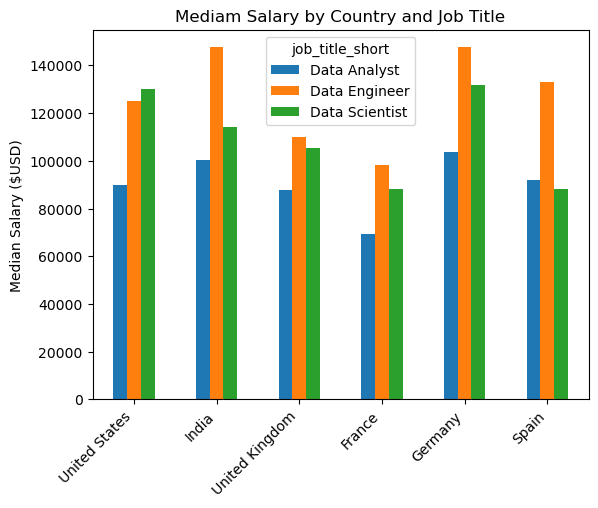

In [25]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Mediam Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show